In [3]:
# Yes, you can use the bnlearn library to perform similar tasks! bnlearn is another Python library for working with Bayesian Networks, and it has simple APIs for learning the structure and performing inference.

# Below is a guide to help you implement your task using the bnlearn library.
# Steps:

#     Install bnlearn.
#     Load the dataset.
#     Learn the structure of the Bayesian Network.
#     Learn the CPDs from the data.
#     Perform Inference for the Queries.

# 1. Install bnlearn:
# If you don't have bnlearn installed, you can install it using pip:

# 2. Load the Dataset:
# You can use pandas to load your dataset as usual. Assuming the dataset is in a CSV file:

import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv(r'C:\Users\Student\Documents\Module Dev Containers\AAI-assignment\mycode\dementia_data-MRI-features.csv')
print(data.head())


  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


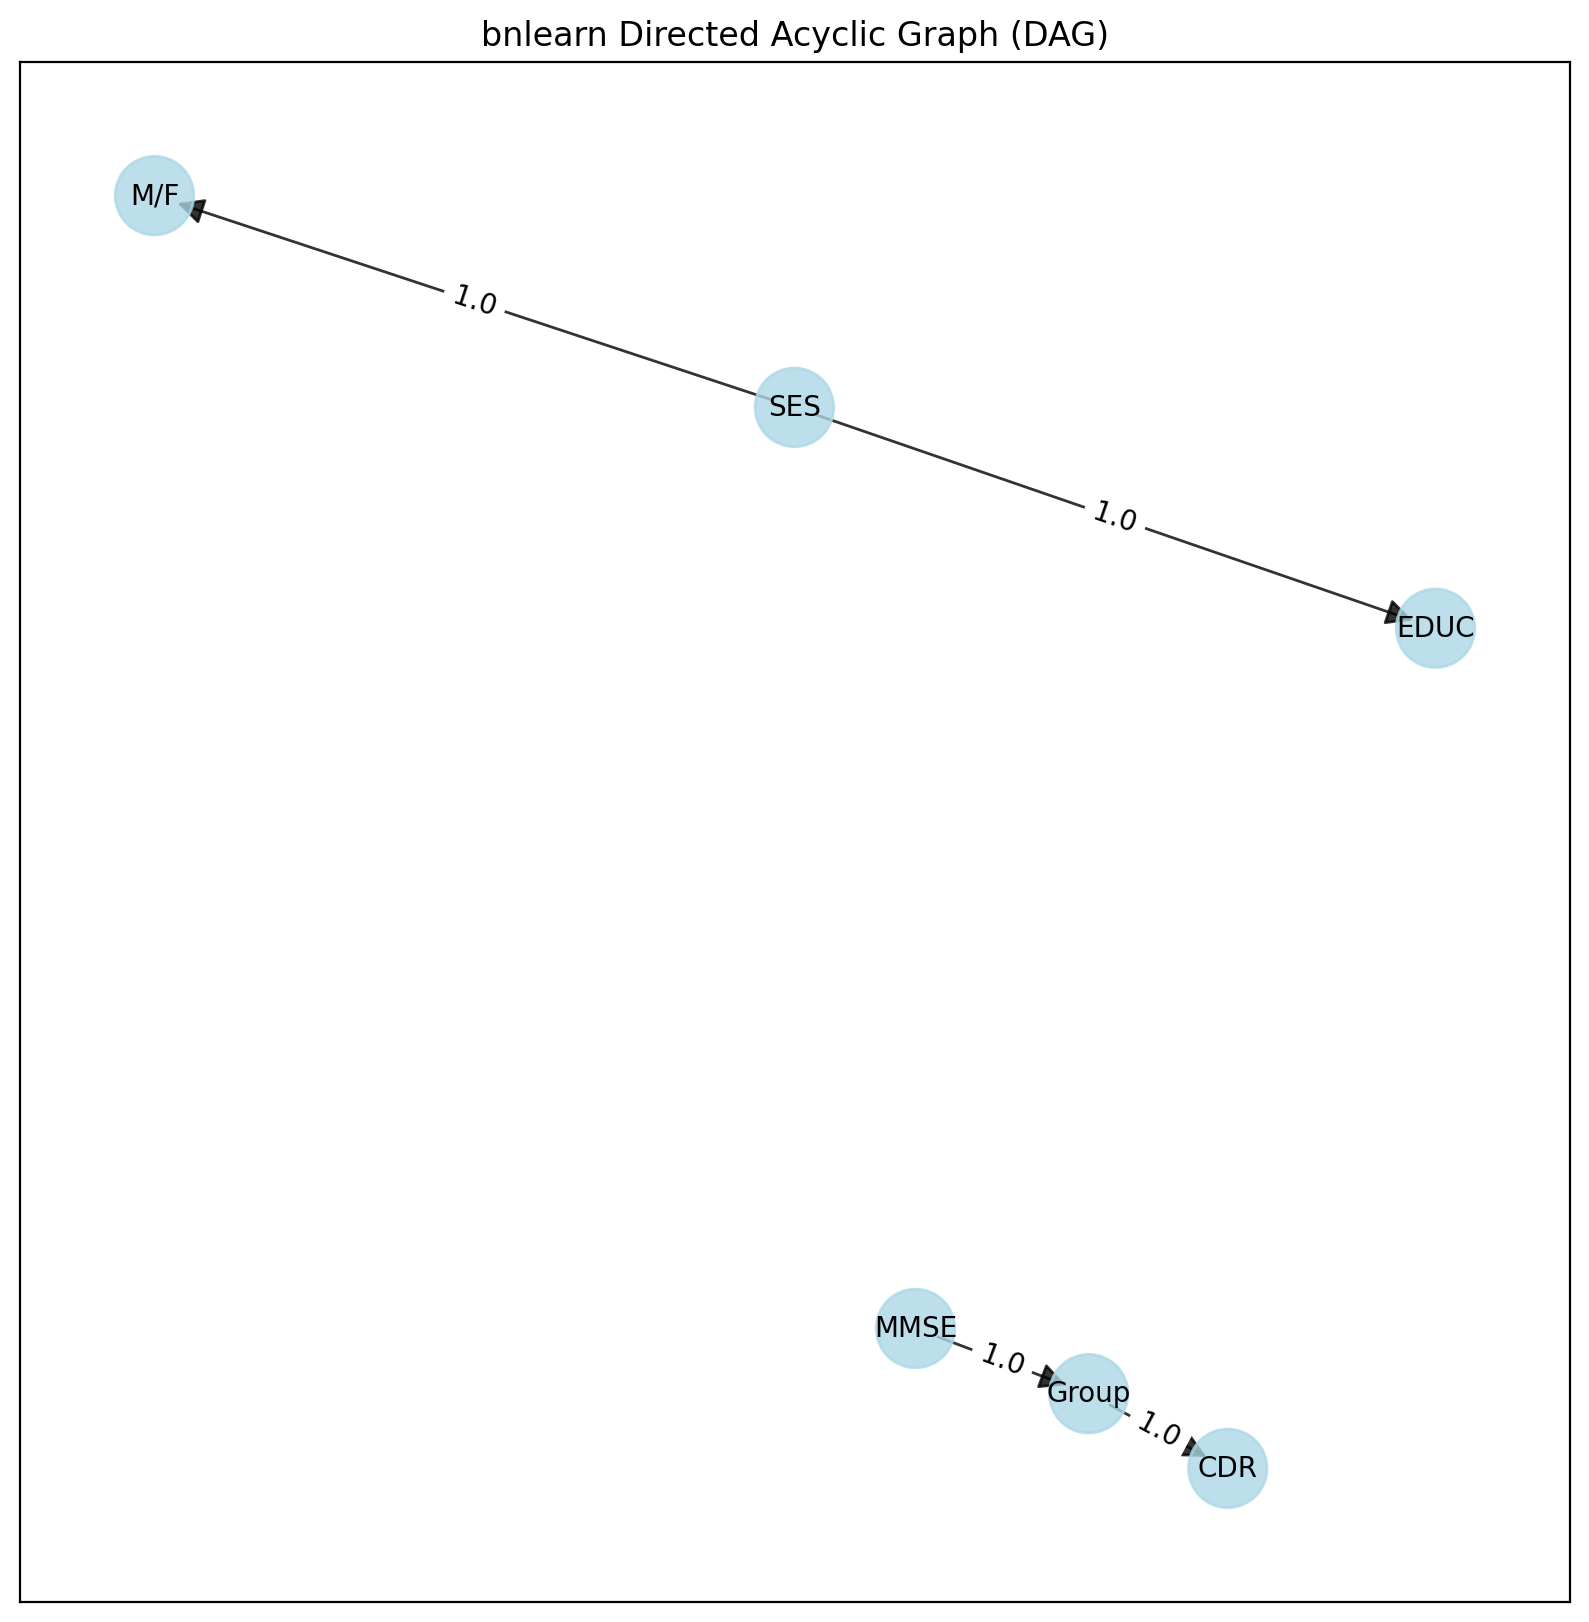

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'Group': array([ 0.19528548, -0.43599004]),
  'CDR': array([ 0.37322236, -0.50241931]),
  'SES': array([-0.18122775,  0.44148883]),
  'M/F': array([-1.        ,  0.62985849]),
  'EDUC': array([0.63901036, 0.24499612]),
  'MMSE': array([-0.02629045, -0.37793409])},
 'G': <networkx.classes.digraph.DiGraph at 0x1c8643afc20>,
 'node_properties': {'Subject ID': {'node_color': '#ADD8E6', 'node_size': 800},
  'MRI ID': {'node_color': '#ADD8E6', 'node_size': 800},
  'Group': {'node_color': '#ADD8E6', 'node_size': 800},
  'Visit': {'node_color': '#ADD8E6', 'node_size': 800},
  'MR Delay': {'node_color': '#ADD8E6', 'node_size': 800},
  'M/F': {'node_color': '#ADD8E6', 'node_size': 800},
  'Hand': {'node_color': '#ADD8E6', 'node_size': 800},
  'Age': {'node_color': '#ADD8E6', 'node_size': 800},
  'EDUC': {'node_color': '#ADD8E6', 'node_size': 800},
  'SES': {'node_color': '#ADD8E6', 'node_size': 800}

In [10]:

# 3. Learn the Structure of the Bayesian Network:

# bnlearn can learn the structure of the Bayesian Network from the data using various search algorithms. You can start by using bnlearn's structure_learning function.

import bnlearn

# Learn the structure of the Bayesian Network
model = bnlearn.structure_learning.fit(data)

# Visualize the structure of the learned network
# model.plot()
bnlearn.plot(model)

In [9]:
# 3. Learn the Structure of the Bayesian Network:

# bnlearn can learn the structure of the Bayesian Network from the data using various search algorithms. You can start by using bnlearn's structure_learning function.

# Learn the CPDs based on the dataset
model = bnlearn.parameter_learning.fit(model, data)

# Now the model contains the learned CPDs
# This step uses structure learning to determine the relationships (edges) between variables in the Bayesian Network based on the data.
# If you already have a predefined structure, you can manually define it, but this approach is useful for automatically learning from the data.


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Group:
+--------------------+-----+---------------------+
| MMSE               | ... | MMSE(30.0)          |
+--------------------+-----+---------------------+
| Group(Converted)   | ... | 0.19768457841852338 |
+--------------------+-----+---------------------+
| Group(Demented)    | ... | 0.1740934906072521  |
+--------------------+-----+---------------------+
| Group(Nondemented) | ... | 0.6282219309742246  |
+--------------------+-----+---------------------+
[bnlearn] >CPD of CDR:
+----------+---------------------+---------------------+---------------------+
| Group    | Group(Converted)    | Group(Demented)     | Group(Nondemented)  |
+----------+---------------------+---------------------+---------------------+
| CDR(0.0) | 0.27362736273627364 | 0.17385257301808069 | 0.518

In [ ]:
# 4. Learn the Conditional Probability Distributions (CPDs):

# Once you have the structure, you can learn the CPDs (conditional probability distributions) using bnlearn's parameter_learning method.

# Learn the CPDs based on the dataset
model = bnlearn.parameter_learning.fit(model, data)

# Now the model contains the learned CPDs


In [ ]:
# 5. Perform Inference:
# Now, you can use bnlearn to perform inference on the learned network. Inference allows you to calculate conditional probabilities given some evidence.
# For your specific queries, you would use bnlearn's query function.
# Here’s how you would compute the probability P(Group=nondemented | visit=2, Age=88, EDUC=14, MMSE=30, CDR=0, eTIV=2004, nWBV=0.681, ASF=0.876):


# Define the evidence for the query
evidence = {
    'visit': 2,
    'Age': 88,
    'EDUC': 14,
    'MMSE': 30,
    'CDR': 0,
    'eTIV': 2004,
    'nWBV': 0.681,
    'ASF': 0.876
}

# Perform the query
query_result = bnlearn.inference.fit(model, variables=['Group'], evidence=evidence)

# Print the result
print(query_result)


In [ ]:
# Similarly, for the second query P(Group=demented | visit=3, Age=80, EDUC=12, MMSE=22, CDR=0.5, eTIV=1698, nWBV=0.701, ASF=1.034), you can follow the same procedure:

# Define the second set of evidence
evidence_2 = {
    'visit': 3,
    'Age': 80,
    'EDUC': 12,
    'MMSE': 22,
    'CDR': 0.5,
    'eTIV': 1698,
    'nWBV': 0.701,
    'ASF': 1.034
}

# Perform the second query
query_result_2 = bnlearn.inference.fit(model, variables=['Group'], evidence=evidence_2)

# Print the result
print(query_result_2)


In [ ]:
# import pandas as pd
# import bnlearn

# # Load your dataset (replace 'your_dataset.csv' with the actual filename)
# data = pd.read_csv('your_dataset.csv')

# # Learn the structure of the Bayesian Network from the data
# model = bnlearn.structure_learning.fit(data)

# # Visualize the structure of the learned network
# model.plot()

# # Learn the CPDs from the data
# model = bnlearn.parameter_learning.fit(model, data)

# # Query 1: P(Group=nondemented | visit=2, Age=88, EDUC=14, MMSE=30, CDR=0, eTIV=2004, nWBV=0.681, ASF=0.876)
# evidence_1 = {
#     'visit': 2,
#     'Age': 88,
#     'EDUC': 14,
#     'MMSE': 30,
#     'CDR': 0,
#     'eTIV': 2004,
#     'nWBV': 0.681,
#     'ASF': 0.876
# }
# query_result_1 = bnlearn.inference.fit(model, variables=['Group'], evidence=evidence_1)
# print("Query 1 Result: ", query_result_1)

# # Query 2: P(Group=demented | visit=3, Age=80, EDUC=12, MMSE=22, CDR=0.5, eTIV=1698, nWBV=0.701, ASF=1.034)
# evidence_2 = {
#     'visit': 3,
#     'Age': 80,
#     'EDUC': 12,
#     'MMSE': 22,
#     'CDR': 0.5,
#     'eTIV': 1698,
#     'nWBV': 0.701,
#     'ASF': 1.034
# }
# query_result_2 = bnlearn.inference.fit(model, variables=['Group'], evidence=evidence_2)
# print("Query 2 Result: ", query_result_2)


In [ ]:
# Notes:

#     Structure Learning: The structure learning is an automatic process and can sometimes require tuning of hyperparameters to ensure a good network structure. You can specify the search method (e.g., Hill Climbing, etc.) if needed.
#     Parameter Learning: If you already have CPDs from another source (e.g., domain knowledge), you can manually add them to the model. However, bnlearn allows parameter learning directly from the data as shown.
#     Querying: bnlearn uses inference.fit() for querying the network. The result contains the conditional probability distributions for the queried variable(s).

# Conclusion:

# By using the bnlearn library, you can simplify the process of building and querying Bayesian Networks. This approach should work for your task to answer probabilistic queries based on the provided evidence. Let me know if you need further assistance!